### correlation analysis of average team rank with collective intelligence metrics of teams

In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
teamCollectiveIntelligenceMetrics = pd.read_csv('../dataset/team_factor_and_labels.csv')
print(teamCollectiveIntelligenceMetrics.columns)

filteredMatchDetails = pd.read_csv('../dataset/filteredMatchDetails.csv')
teamAverageRankInfo = filteredMatchDetails[['gameId', 'teamId', 'teamAverageRank', 'matchAverageRank']]
teamAverageRankInfo.drop_duplicates(inplace=True)
print(teamAverageRankInfo.shape)


Index(['gameId', 'teamId', 'win', 'averageTeamGoldPerMin',
       'averageTeamExpPerMin', 'averageTeamVPM', 'teamIndegreeCentrality',
       'teamOutdegreeCentrality', 'resistance', 'NonCooperativeFactor',
       'CooperativeFactor', 'team_labels', 'isGoodTeam', 'teamClusterLabel'],
      dtype='object')
(62110, 4)


/tmp/ipykernel_48866/1543098481.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  teamAverageRankInfo.drop_duplicates(inplace=True)


In [3]:
# merge the two dataframes
teamCollectiveIntelligenceMetrics = teamCollectiveIntelligenceMetrics.merge(teamAverageRankInfo, on=['gameId', 'teamId'], how='inner')
metrics_correlation_df = teamCollectiveIntelligenceMetrics[['gameId', 'teamId', 'teamIndegreeCentrality', 'teamOutdegreeCentrality', 'resistance', 'CooperativeFactor', 'NonCooperativeFactor', 'teamAverageRank']]
print(metrics_correlation_df.shape)

(62110, 8)


In [4]:
def convertNumericalRank(nRank):
    if nRank > 30:
        return 'Challenger'
    elif nRank <=30 and nRank > 29:
        return 'Grandmaster'
    elif nRank <= 29 and nRank > 28:
        return 'Master'
    elif nRank <= 28 and nRank > 24:
        return 'Diamond'
    elif nRank <= 24 and nRank > 20:
        return 'Emerald'
    elif nRank <= 20 and nRank > 16:
        return 'Platinum'
    elif nRank <= 16 and nRank > 12:
        return 'Gold'
    elif nRank <= 12 and nRank > 8:
        return 'Silver'
    elif nRank <= 8 and nRank > 4:
        return 'Bronze'
    else:
        return 'Iron'
    
metrics_correlation_df['categoricalTeamAverageRank'] = metrics_correlation_df['teamAverageRank'].apply(convertNumericalRank)

/tmp/ipykernel_48866/2690767778.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metrics_correlation_df['categoricalTeamAverageRank'] = metrics_correlation_df['teamAverageRank'].apply(convertNumericalRank)


In [5]:
metrics_correlation_df

,gameId,teamId,teamIndegreeCentrality,teamOutdegreeCentrality,resistance,CooperativeFactor,NonCooperativeFactor,teamAverageRank,categoricalTeamAverageRank
0,EUW1_7139824479,100,0.227941,0.080882,0.6500,-0.738828,0.731456,4.0,Iron
1,EUW1_7139824479,200,0.204545,0.172078,0.5907,-0.065562,0.201695,7.8,Bronze
2,EUW1_7140549083,100,0.240196,0.142157,1.0599,0.016391,0.419814,28.8,Master
3,EUW1_7140549083,200,0.174757,0.065534,0.4496,-0.102221,-2.502744,27.4,Diamond
4,EUW1_7139855952,100,0.173729,0.067797,1.0129,-0.414528,-0.656660,8.8,Silver
...,...,...,...,...,...,...,...,...,...
62105,EUW1_7139969225,200,0.312500,0.125000,3.3925,1.058529,1.052832,11.4,Silver
62106,EUW1_7142645284,100,0.158163,0.119898,0.4297,-0.496168,-0.477343,10.6,Silver
62107,EUW1_7142645284,200,0.375000,0.125000,4.6447,1.371913,2.322292,11.2,Silver
62108,EUW1_7139963823,100,0.172535,0.059859,0.6575,-0.860070,0.099316,29.0,Master


In [6]:
metrics_correlation_df['categoricalTeamAverageRank'].value_counts()

categoricalTeamAverageRank
Diamond        16629
Silver          8088
Gold            7821
Bronze          7386
Platinum        6202
Master          5962
Emerald         5219
Iron            2827
Grandmaster     1874
Challenger       102
Name: count, dtype: int64

/tmp/ipykernel_48866/2919715382.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="categoricalTeamAverageRank", y=metric, data=metrics_correlation_df, order=ranking_order, palette=ranking_color_map, inner="quart", ax=axes[i])
/tmp/ipykernel_48866/2919715382.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="categoricalTeamAverageRank", y=metric, data=metrics_correlation_df, order=ranking_order, palette=ranking_color_map, inner="quart", ax=axes[i])
/tmp/ipykernel_48866/2919715382.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.vi

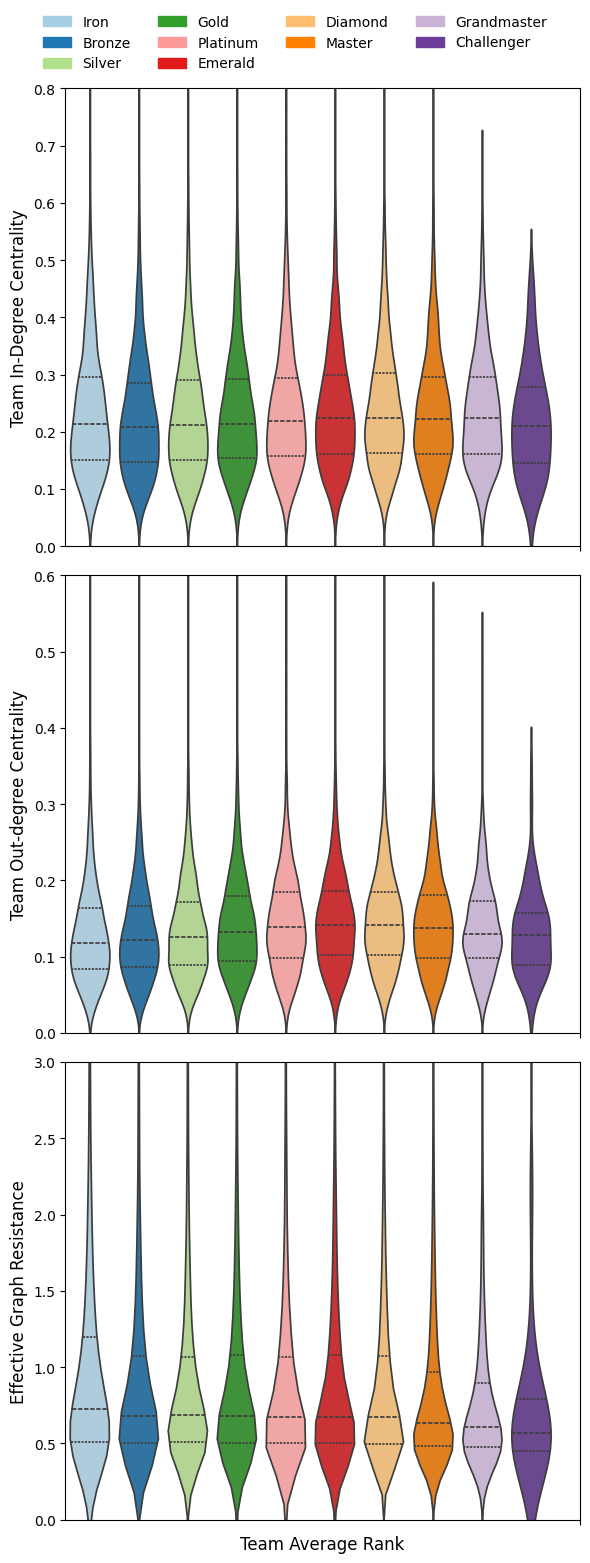

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming your dataframe is named 'df'
metrics = ['teamIndegreeCentrality', 'teamOutdegreeCentrality', 'resistance']

ranking_order = ['Iron', 'Bronze', 'Silver', 'Gold', 'Platinum', 'Emerald', 'Diamond', 'Master', 'Grandmaster', 'Challenger']

ranking_color_map = {'Iron': '#a6cee3', 
                     'Bronze': '#1f78b4',
                     'Silver': '#b2df8a', 
                     'Gold': '#33a02c',
                     'Platinum': '#fb9a99', 
                     'Emerald': '#e31a1c', 
                     'Diamond': '#fdbf6f', 
                     'Master': '#ff7f00', 
                     'Grandmaster': '#cab2d6', 
                     'Challenger': '#6a3d9a' 
                    }

metric_labels_map = {'teamIndegreeCentrality': 'Team In-Degree Centrality', 'teamOutdegreeCentrality': 'Team Out-degree Centrality', 'resistance': 'Effective Graph Resistance'}

fig, axes = plt.subplots(3, 1, figsize=(6, 15), sharex=True)

for i, metric in enumerate(metrics):
    sns.violinplot(x="categoricalTeamAverageRank", y=metric, data=metrics_correlation_df, order=ranking_order, palette=ranking_color_map, inner="quart", ax=axes[i])
    axes[i].set_xlabel("Team Average Rank", fontsize=12)
    axes[i].set_ylabel(f"{metric_labels_map[metric]}", fontsize=12)
    axes[i].set_xticks([''])

handles = [mpatches.Patch(color=ranking_color_map[rank], label=rank) for rank in ranking_order]
# handles, labels = axes[0].get_legend_handles_labels()
fig.legend(handles, ranking_order, loc="lower center", bbox_to_anchor=(0.5, 0.99), ncols=4, frameon=False)


axes[0].set_ylim(0, 0.8)
axes[1].set_ylim(0, 0.6)
axes[2].set_ylim(0, 3)

plt.tight_layout()
plt.show()


In [8]:
from scipy import stats

concerned_df = metrics_correlation_df[['teamIndegreeCentrality', 'teamOutdegreeCentrality', 'resistance', 'CooperativeFactor', 'NonCooperativeFactor', 'teamAverageRank']]
concerned_df.drop_duplicates(inplace=True)

# correlation statistics for team in-degree centrality
num_data_points = concerned_df.shape[0]
rsquared, pval = stats.pearsonr(concerned_df['teamIndegreeCentrality'], concerned_df['teamAverageRank'])
print(f"Team in-degree centrality vs Ranks -> R2: {rsquared}; pval:{pval}")

# correlation statistics for team out-degree centrality
num_data_points = concerned_df.shape[0]
rsquared, pval = stats.pearsonr(concerned_df['teamOutdegreeCentrality'], concerned_df['teamAverageRank'])
print(f"Team out-degree centrality vs Ranks -> R2: {rsquared}; pval:{pval}")

# correlation statistics for effective graph resistance
num_data_points = concerned_df.shape[0]
rsquared, pval = stats.pearsonr(concerned_df['resistance'], concerned_df['teamAverageRank'])
print(f"Effective graph resistance vs Ranks -> R2: {rsquared}; pval:{pval}")

Team in-degree centrality vs Ranks -> R2: 0.04172750547815768; pval:2.3874036502637485e-25
Team out-degree centrality vs Ranks -> R2: 0.08215265387655944; pval:1.8174054122042699e-93
Effective graph resistance vs Ranks -> R2: -0.0430273232824034; pval:7.523133946238858e-27


/tmp/ipykernel_48866/1324649241.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  concerned_df.drop_duplicates(inplace=True)


### Invert the violin plot axes

/tmp/ipykernel_48866/1676216899.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y="categoricalTeamAverageRank", x=metric, data=metrics_correlation_df, order=ranking_order, palette=ranking_color_map, inner="quart", ax=axes[i])
/tmp/ipykernel_48866/1676216899.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(y="categoricalTeamAverageRank", x=metric, data=metrics_correlation_df, order=ranking_order, palette=ranking_color_map, inner="quart", ax=axes[i])
/tmp/ipykernel_48866/1676216899.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.vi

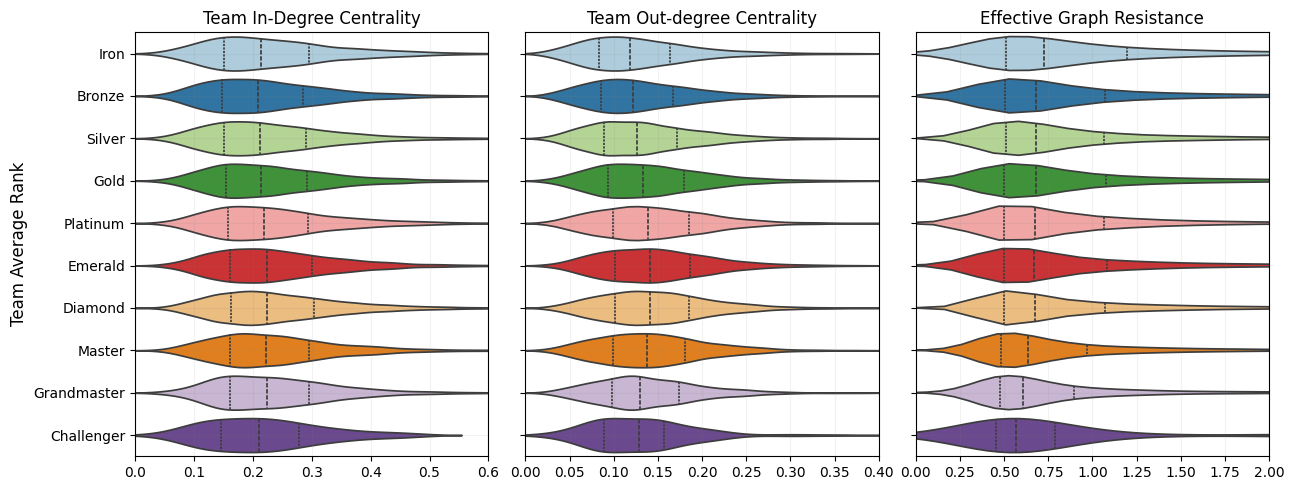

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Assuming your dataframe is named 'df'
metrics = ['teamIndegreeCentrality', 'teamOutdegreeCentrality', 'resistance']

ranking_order = ['Iron', 'Bronze', 'Silver', 'Gold', 'Platinum', 'Emerald', 'Diamond', 'Master', 'Grandmaster', 'Challenger']

ranking_color_map = {'Iron': '#a6cee3', 
                     'Bronze': '#1f78b4',
                     'Silver': '#b2df8a', 
                     'Gold': '#33a02c',
                     'Platinum': '#fb9a99', 
                     'Emerald': '#e31a1c', 
                     'Diamond': '#fdbf6f', 
                     'Master': '#ff7f00', 
                     'Grandmaster': '#cab2d6', 
                     'Challenger': '#6a3d9a' 
                    }

metric_labels_map = {'teamIndegreeCentrality': 'Team In-Degree Centrality', 'teamOutdegreeCentrality': 'Team Out-degree Centrality', 'resistance': 'Effective Graph Resistance'}

fig, axes = plt.subplots(1, 3, figsize=(13, 5), sharey=True)

for i, metric in enumerate(metrics):
    sns.violinplot(y="categoricalTeamAverageRank", x=metric, data=metrics_correlation_df, order=ranking_order, palette=ranking_color_map, inner="quart", ax=axes[i])
    axes[i].set_ylabel("Team Average Rank", fontsize=12)
    axes[i].set_title(f"{metric_labels_map[metric]}", fontsize=12)
    axes[i].set_xlabel('')
    axes[i].grid(alpha=0.1, axis='both', color='gray')

# handles = [mpatches.Patch(color=ranking_color_map[rank], label=rank) for rank in ranking_order]
# handles, labels = axes[0].get_legend_handles_labels()
# fig.legend(handles, ranking_order, loc="lower center", bbox_to_anchor=(0.5, 0.99), ncols=10, frameon=False)

axes[0].set_xlim(0, 0.6)
axes[1].set_xlim(0, 0.4)
axes[2].set_xlim(0, 2)

plt.tight_layout()
plt.show()


In [10]:
## inspect on the extreme outlier values for each tier ranking
metrics_correlation_df

# mean values of teamIndegreeCentrality, teamOutdegreeCentrality and resistance grouped across categoricalTeamAverageRank
categoricalAverages = metrics_correlation_df.groupby(['categoricalTeamAverageRank'])[['teamIndegreeCentrality', 'teamOutdegreeCentrality', 'resistance']].mean().reset_index()
categoricalAverages

,categoricalTeamAverageRank,teamIndegreeCentrality,teamOutdegreeCentrality,resistance
0,Bronze,0.227549,0.131951,0.998054
1,Challenger,0.218984,0.131144,0.755968
2,Diamond,0.242990,0.147970,0.947128
3,Emerald,0.241051,0.148619,0.959211
4,Gold,0.233515,0.142233,0.990758
5,Grandmaster,0.237223,0.139368,0.813682
6,Iron,0.235067,0.129715,1.055012
7,Master,0.238482,0.143631,0.878198
8,Platinum,0.237230,0.145736,0.954926
9,Silver,0.230803,0.135845,0.975722


In [11]:
categoricalAverages.sort_values(by='resistance', ascending=False)

,categoricalTeamAverageRank,teamIndegreeCentrality,teamOutdegreeCentrality,resistance
6,Iron,0.235067,0.129715,1.055012
0,Bronze,0.227549,0.131951,0.998054
4,Gold,0.233515,0.142233,0.990758
9,Silver,0.230803,0.135845,0.975722
3,Emerald,0.241051,0.148619,0.959211
8,Platinum,0.237230,0.145736,0.954926
2,Diamond,0.242990,0.147970,0.947128
7,Master,0.238482,0.143631,0.878198
5,Grandmaster,0.237223,0.139368,0.813682
1,Challenger,0.218984,0.131144,0.755968


### One Way ANOVA test or Kruskal Wallis Test


In [12]:
# team average rank value counts to see the number of match records played with each average team rank
metrics_correlation_df['categoricalTeamAverageRank'].value_counts()

categoricalTeamAverageRank
Diamond        16629
Silver          8088
Gold            7821
Bronze          7386
Platinum        6202
Master          5962
Emerald         5219
Iron            2827
Grandmaster     1874
Challenger       102
Name: count, dtype: int64

In [13]:
# check for variances between categoricalTeamAverageRank types using levene's test
from scipy import stats

rankGroupedIndegreeCentrality = [grouped_df['teamIndegreeCentrality']. values for _, grouped_df in metrics_correlation_df.groupby('categoricalTeamAverageRank')]
rankGroupedOutdegreeCentrality = [grouped_df['teamOutdegreeCentrality']. values for _, grouped_df in metrics_correlation_df.groupby('categoricalTeamAverageRank')]
rankGroupedResistance = [grouped_df['resistance']. values for _, grouped_df in metrics_correlation_df.groupby('categoricalTeamAverageRank')]


ind_statistic, ind_pval = stats.levene(*rankGroupedIndegreeCentrality)
print(f"For Indegree Centrality: Levene's test statistic: {ind_statistic}; p-val: {ind_pval}")

outd_statistic, outd_pval = stats.levene(*rankGroupedOutdegreeCentrality)
print(f"For outdegree centrality: Levene's test statistic: {outd_statistic}; p-val: {outd_pval}")

res_statistic, res_pval = stats.levene(*rankGroupedResistance)
print(f"For EGR: Levene's test statistic: {res_statistic}; p-val: {res_pval}")

For Indegree Centrality: Levene's test statistic: 2.554982273960958; p-val: 0.006214579788503111
For outdegree centrality: Levene's test statistic: 3.611008285091857; p-val: 0.0001636307756881473
For EGR: Levene's test statistic: 14.910215412089844; p-val: 1.7360159916565126e-24


### P-Values across each graph metrics are less than 0.05; i.e. significant; thus there are no equal variances of each metric across team ranks; thus we perform Kruskal Wallis Test on each metric

In [14]:
# perform Kruskal-Wallis test on each three metric
ind_kw_stat, ind_kw_pval = stats.kruskal(*rankGroupedIndegreeCentrality)
print(f"test statistic: {ind_kw_stat}; p-val: {ind_kw_pval}")

outd_kw_stat, outd_kw_pval = stats.kruskal(*rankGroupedOutdegreeCentrality)
print(f"test statistic: {outd_kw_stat}; p-val: {outd_kw_pval}")

res_kw_stat, res_kw_pval = stats.kruskal(*rankGroupedResistance)
print(f"test statistic: {res_kw_stat}; p-val: {res_kw_pval}")

test statistic: 178.4313084814627; p-val: 1.076990974022367e-33
test statistic: 756.0763644957423; p-val: 6.023693561654365e-157
test statistic: 182.3633785468356; p-val: 1.6260486912411205e-34
